# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pickle as pkl
import h5py

from pathlib import Path
import os.path
import sys
import datetime
import time

# Settings

In [2]:
PID = 7
smartphone = "N5X"
window_size = 50
HDF5_PATH = str(Path.home())+"/data/hdf/" + smartphone + "-win" + str(window_size) + ".hdf"
interval_index = 42

# Reading

In [3]:
hdf = h5py.File(HDF5_PATH, "r")

train_x = hdf["train/sensors"]
train_y = hdf["train/labels"]

test_x = hdf["test/sensors"]
test_y = hdf["test/labels"]

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1009802, 50, 18, 1) (1009802, 2) (436360, 50, 18, 1) (436360, 2)


In [4]:
train_labels = hdf.get('train/labels').value

# Splitting

In [5]:
tmp = []
indexes = []
for k, label in enumerate(train_labels):
    if not np.array_equal(tmp, label):
        tmp = label
        indexes.append(k)

tmp = hdf["train/sensors"][indexes[(16*9*3 * (PID - 1)) + interval_index]:indexes[(16*9*3 * (PID - 1)) + interval_index + 1]]

In [6]:
values = []
for value in tmp[0]:
    values.append(value)
for k in range(1, len(tmp)):
    values.append(tmp[k][-1])

values = np.array(values).reshape(-1, 18)

# Seperating Sensors

In [7]:
acc = []
gyro = []
ori = []
grav = []
mag = []
rot = []
for sensors in values:
    acc.append(sensors[:3])
    gyro.append(sensors[3:6])
    ori.append(sensors[6:9])
    grav.append(sensors[9:12])
    mag.append(sensors[12:15])
    rot.append(sensors[15:])
acc = np.array(acc)
gyro = np.array(gyro)
ori = np.array(ori)
grav = np.array(grav)
mag = np.array(mag)
rot = np.array(rot)

# Plotting

In [8]:
time = list(range(values.shape[0]))
time = [x*3 for x in time]

## Acc

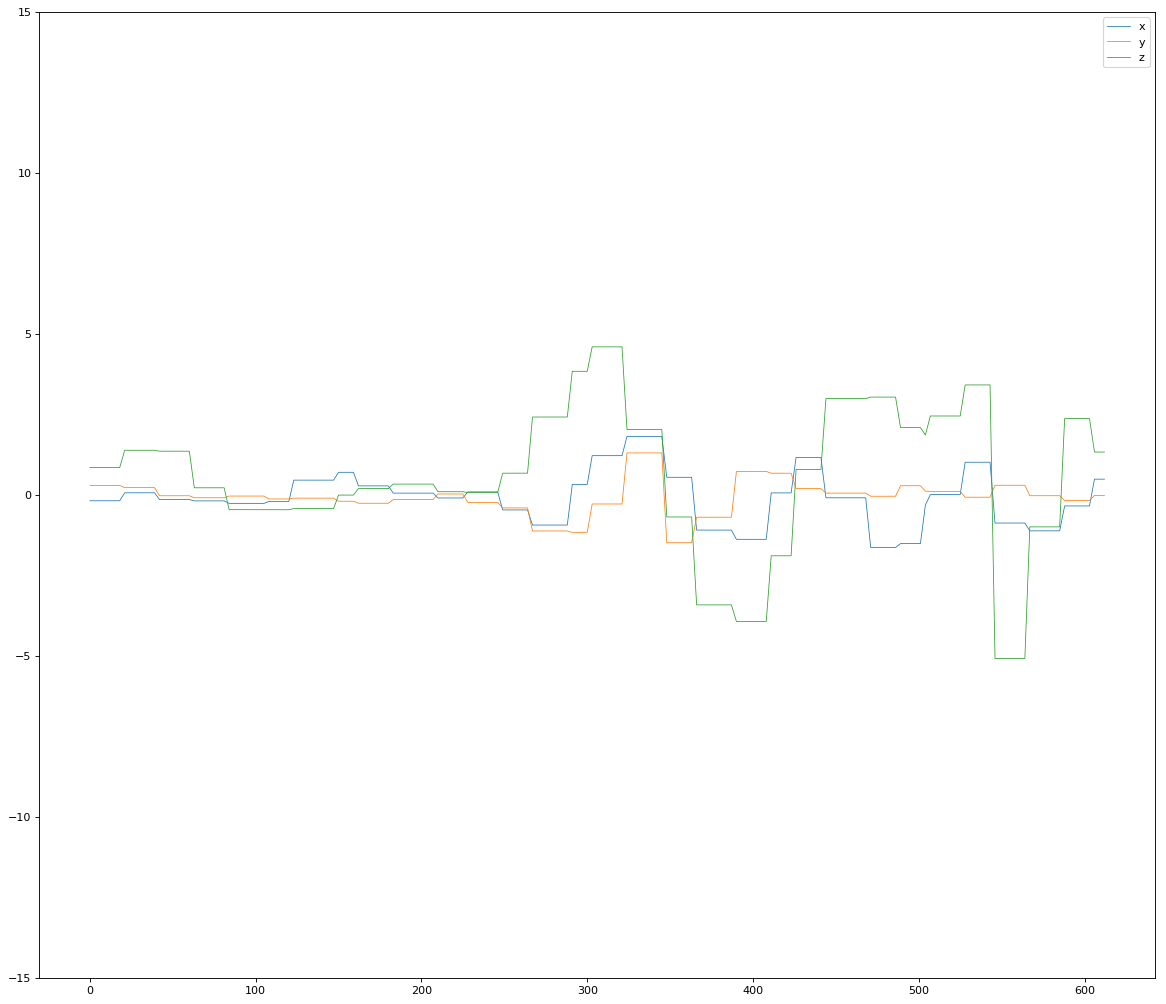

In [9]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, acc.T[0], label='x',linewidth=0.7)
plt.plot(time, acc.T[1], label='y',linewidth=0.7)
plt.plot(time, acc.T[2], label='z',linewidth=0.7)
plt.ylim(-15, 15)
plt.legend()

## Gyro

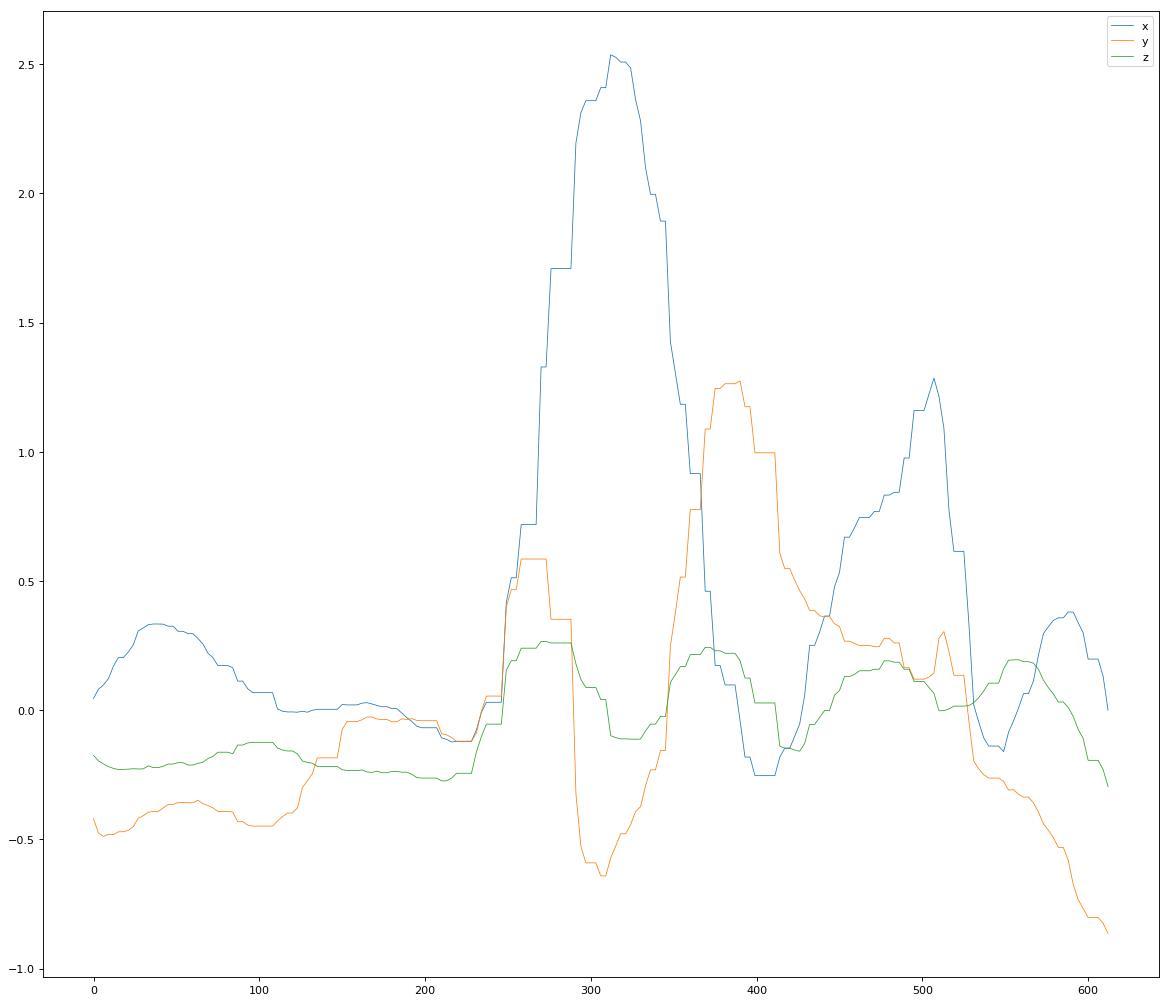

In [10]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, gyro.T[0], label='x',linewidth=0.7)
plt.plot(time, gyro.T[1], label='y',linewidth=0.7)
plt.plot(time, gyro.T[2], label='z',linewidth=0.7)
plt.legend()

## Orientation

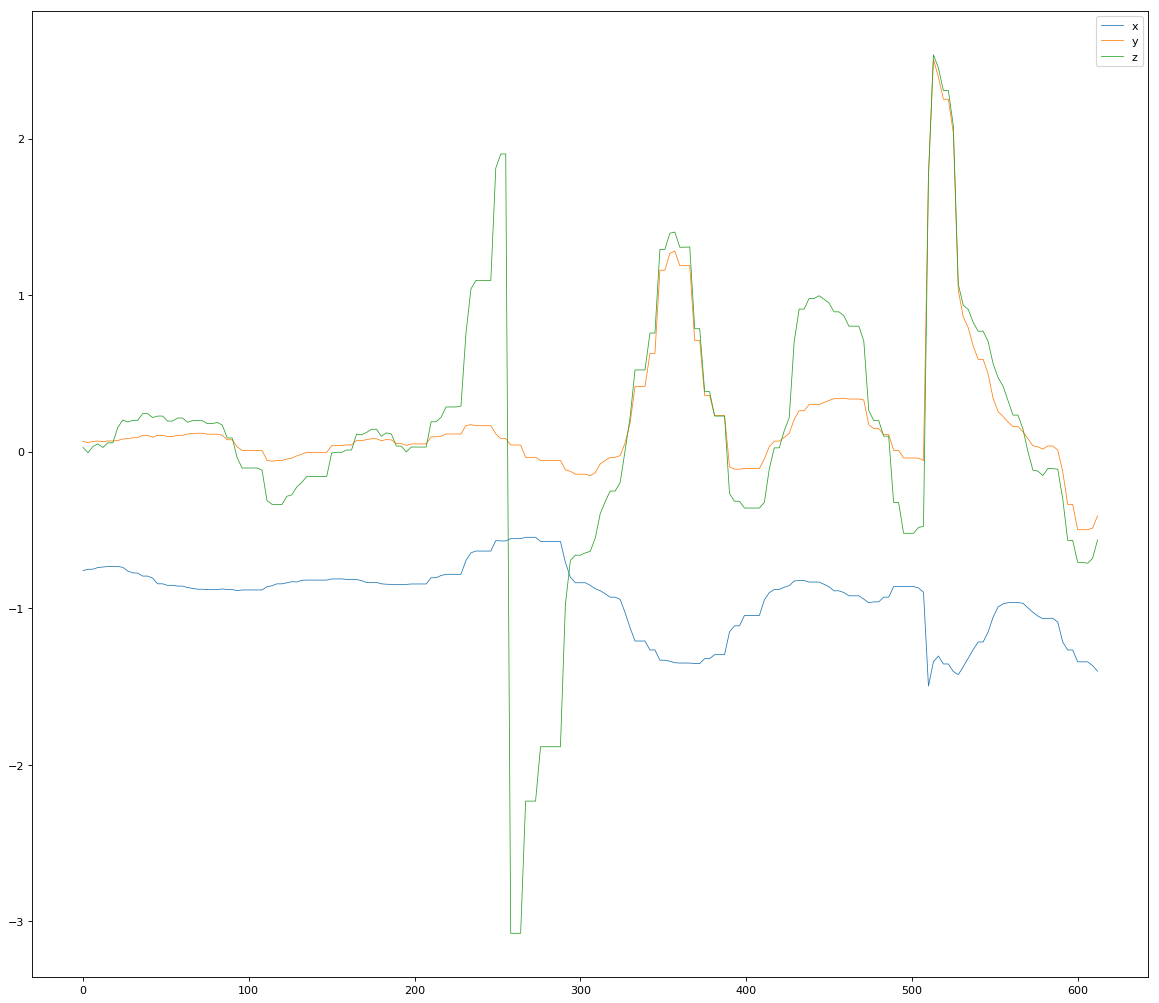

In [11]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, ori.T[0], label='x',linewidth=0.7)
plt.plot(time, ori.T[1], label='y',linewidth=0.7)
plt.plot(time, ori.T[2], label='z',linewidth=0.7)
plt.legend()

## Graviation

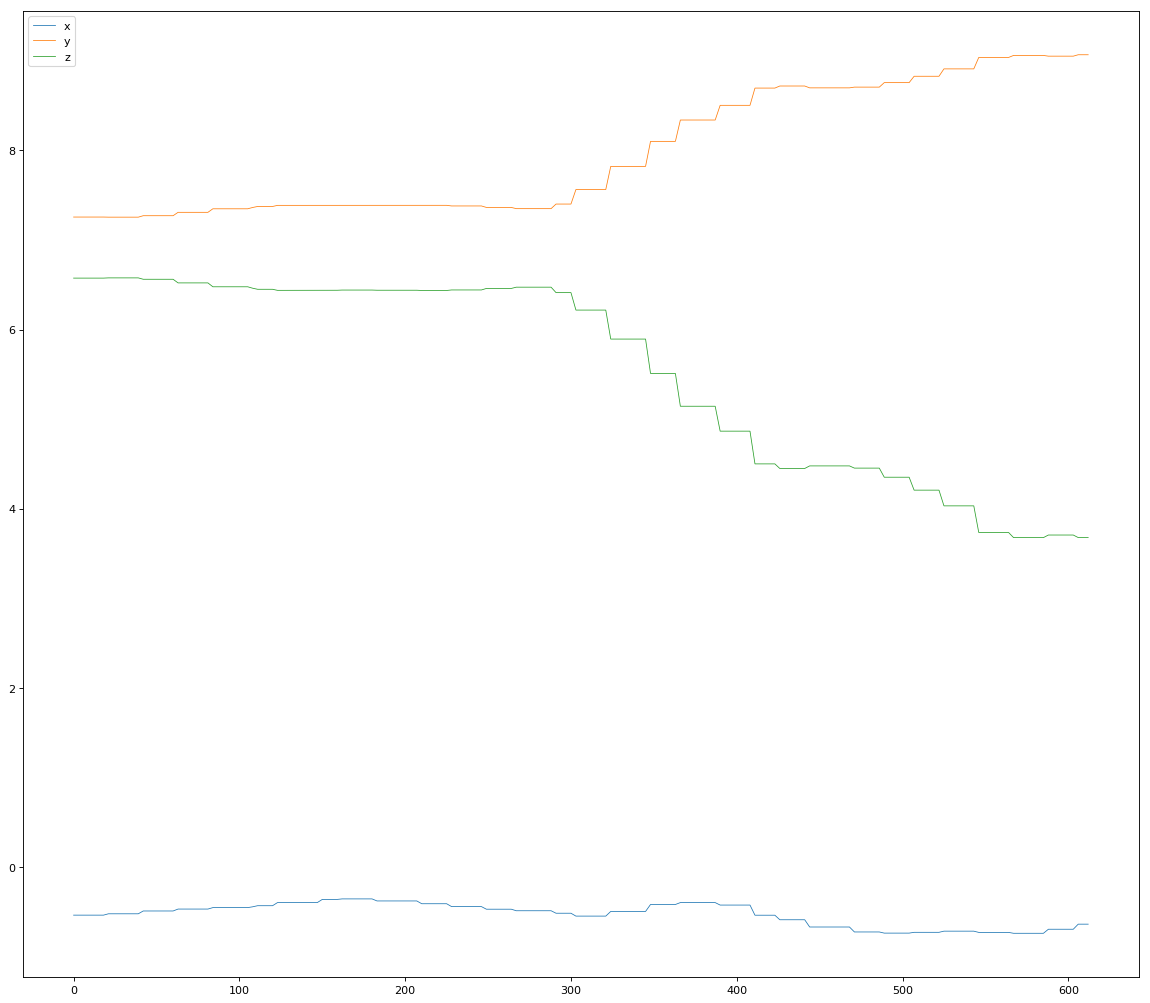

In [12]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, grav.T[0], label='x',linewidth=0.7)
plt.plot(time, grav.T[1], label='y',linewidth=0.7)
plt.plot(time, grav.T[2], label='z',linewidth=0.7)
plt.legend()

## Magnetometer

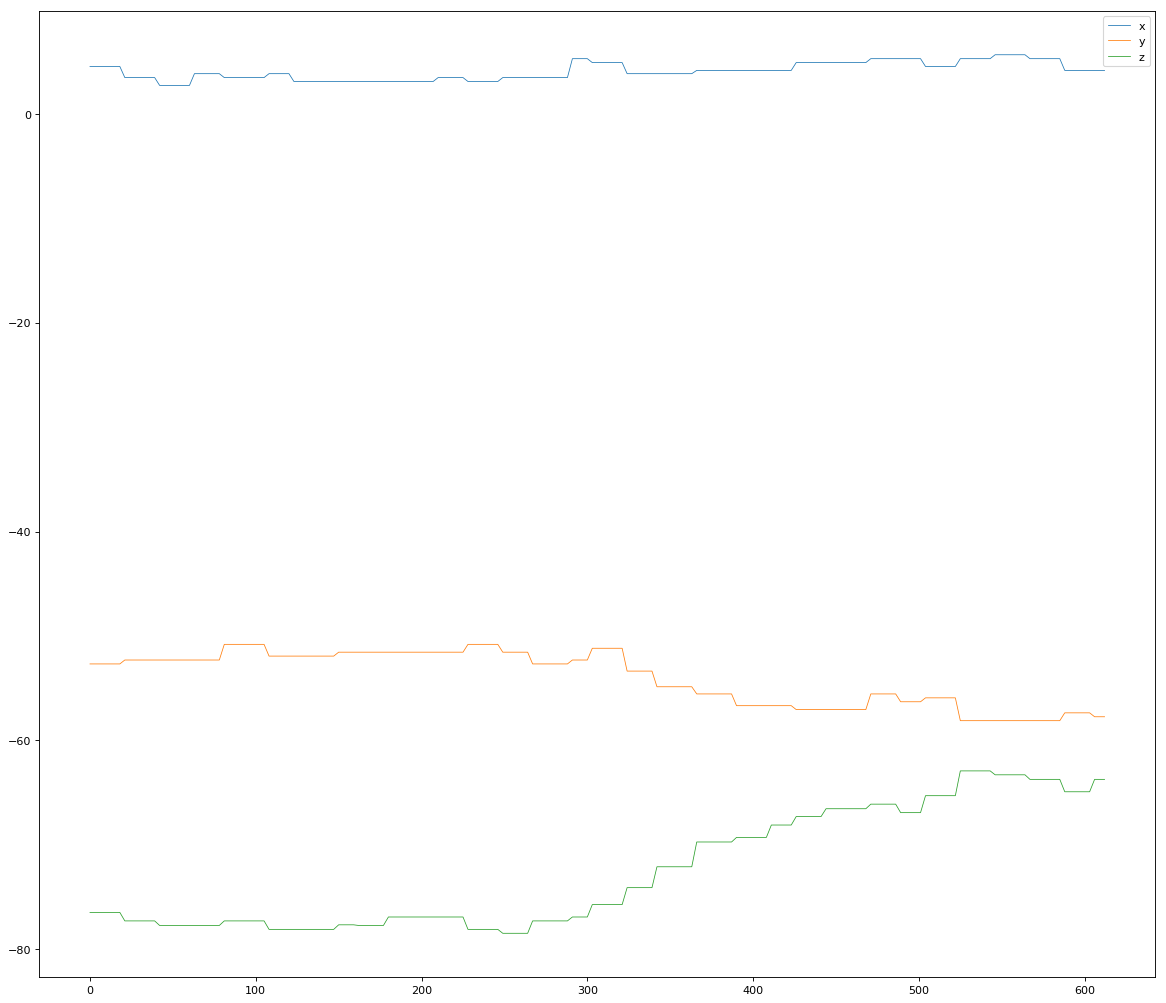

In [13]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, mag.T[0], label='x',linewidth=0.7)
plt.plot(time, mag.T[1], label='y',linewidth=0.7)
plt.plot(time, mag.T[2], label='z',linewidth=0.7)
plt.legend()

## Rotation

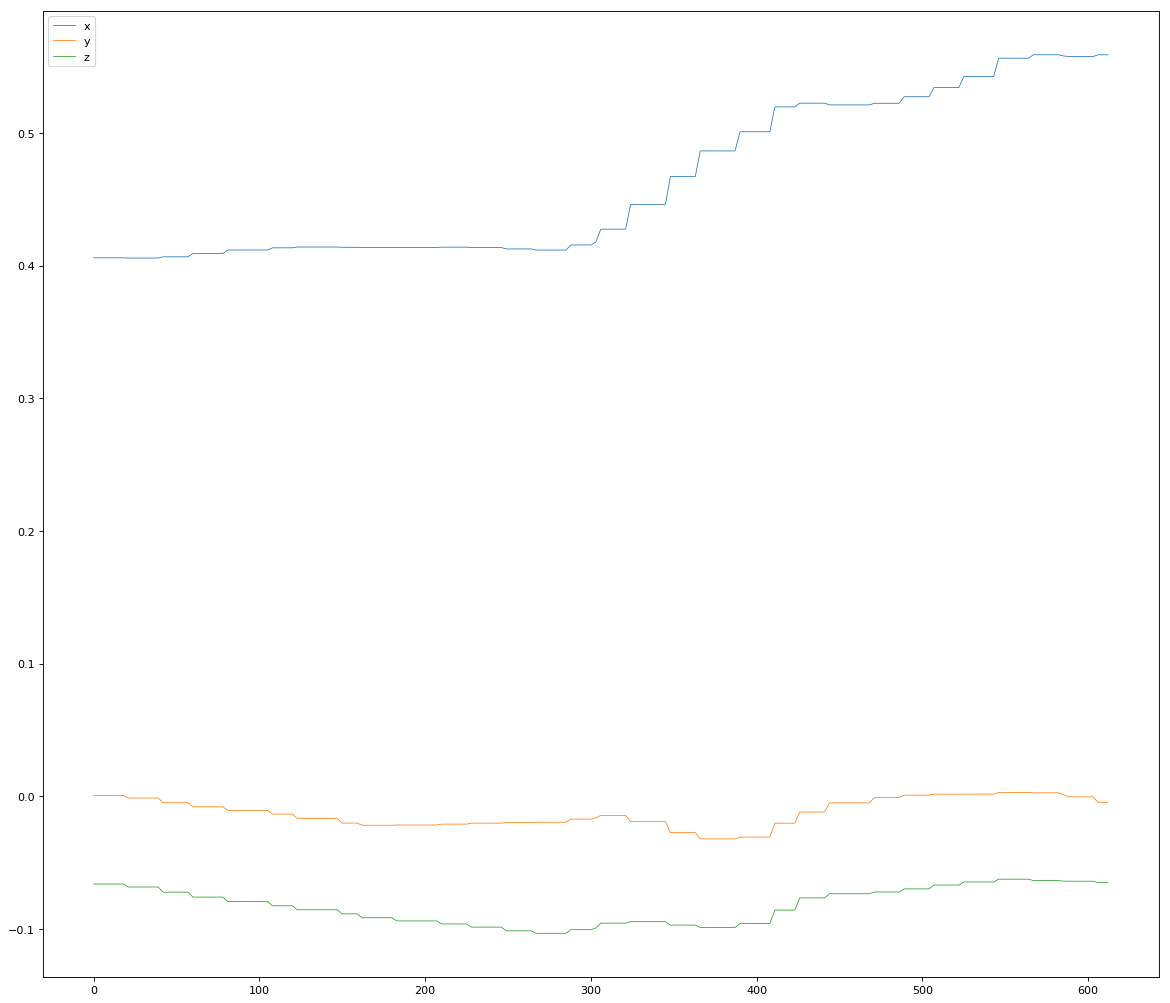

In [14]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, rot.T[0], label='x',linewidth=0.7)
plt.plot(time, rot.T[1], label='y',linewidth=0.7)
plt.plot(time, rot.T[2], label='z',linewidth=0.7)
plt.legend()